In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #to ignore the warnings
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
path = 'AB_NYC_2019.csv'
data = pd.read_csv(path,index_col=0)
data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [4]:
# Выборка содержит 15 параметров

In [5]:
data.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#выкиньте ненужные признаки: id, name, host_id, host_name, last_review

In [7]:
data.drop(['name','host_id','host_name','last_review'], axis = 1 , inplace=True)
data.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Создание списка категориальных переменных
categorial_columns = ['neighbourhood_group','neighbourhood','room_type']
# Создание списка численных переменных
numerical_colums = list(set(data.columns) - set(categorial_columns))

In [9]:
# Вывод базовых статистик
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


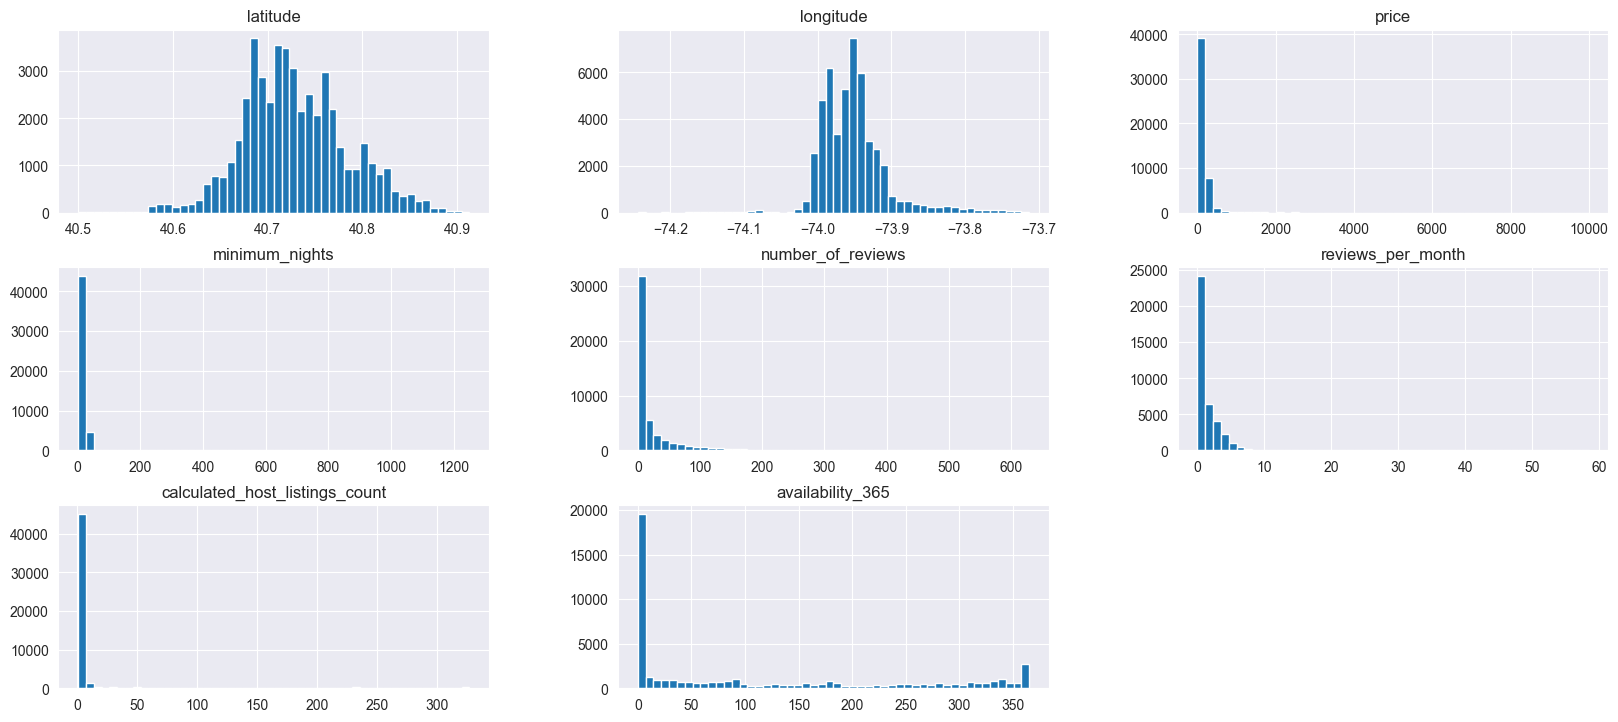

In [10]:
cols = len(data.select_dtypes('number').columns)
data.select_dtypes('number').hist( layout = (cols,3) , figsize = (20,3*cols), bins = 50)
plt.show()

In [11]:
# # Кодирование категориальных переменных
# data = pd.get_dummies(data, columns=['neighbourhood_group', 'room_type'])


Text(0.5, 1.0, 'Correlation Map')

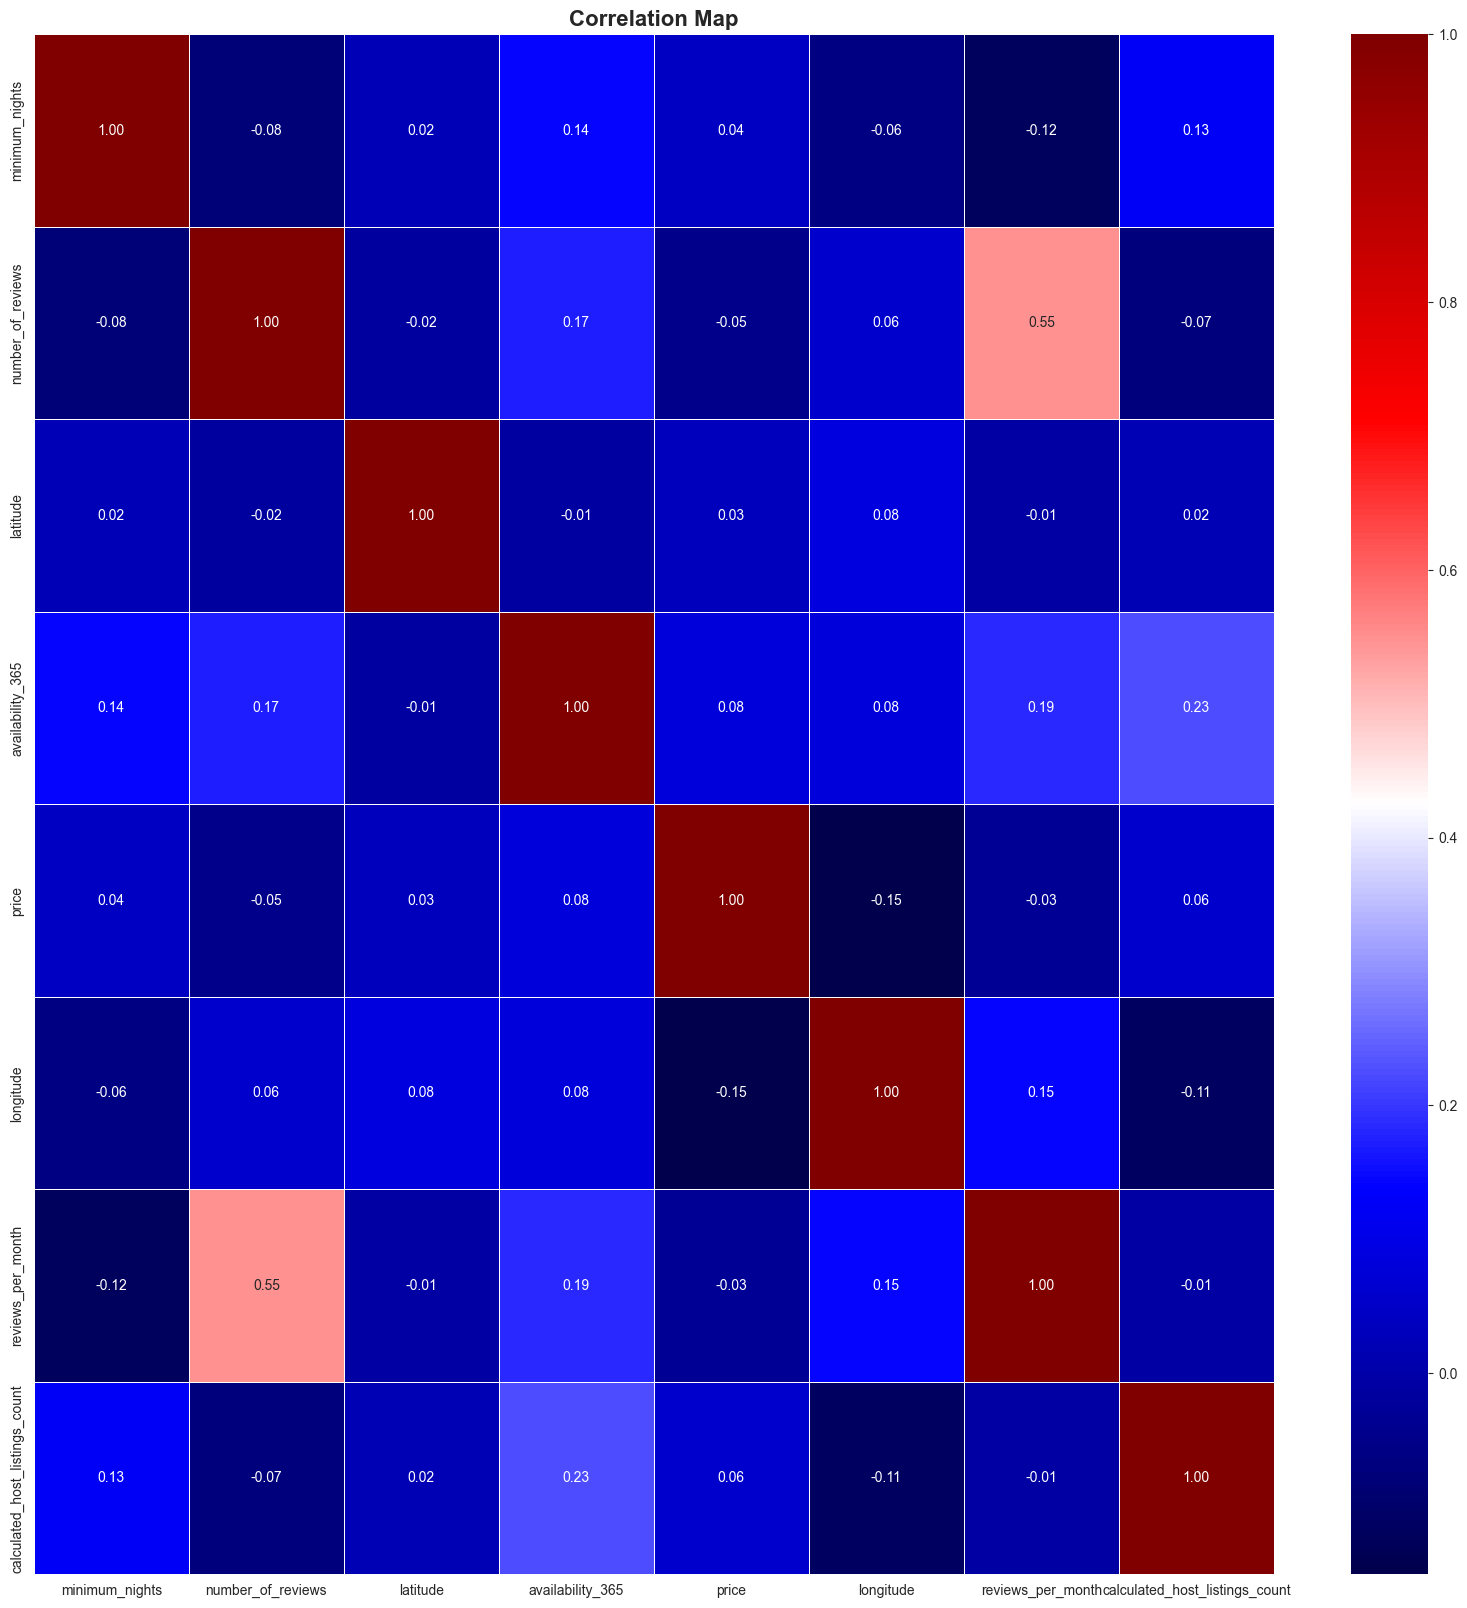

In [12]:
# # Матрица попарных корреляций
corr_numerical = data[numerical_colums].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_numerical, cmap='seismic', annot = True, linewidths=.5, fmt= '.2f')
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

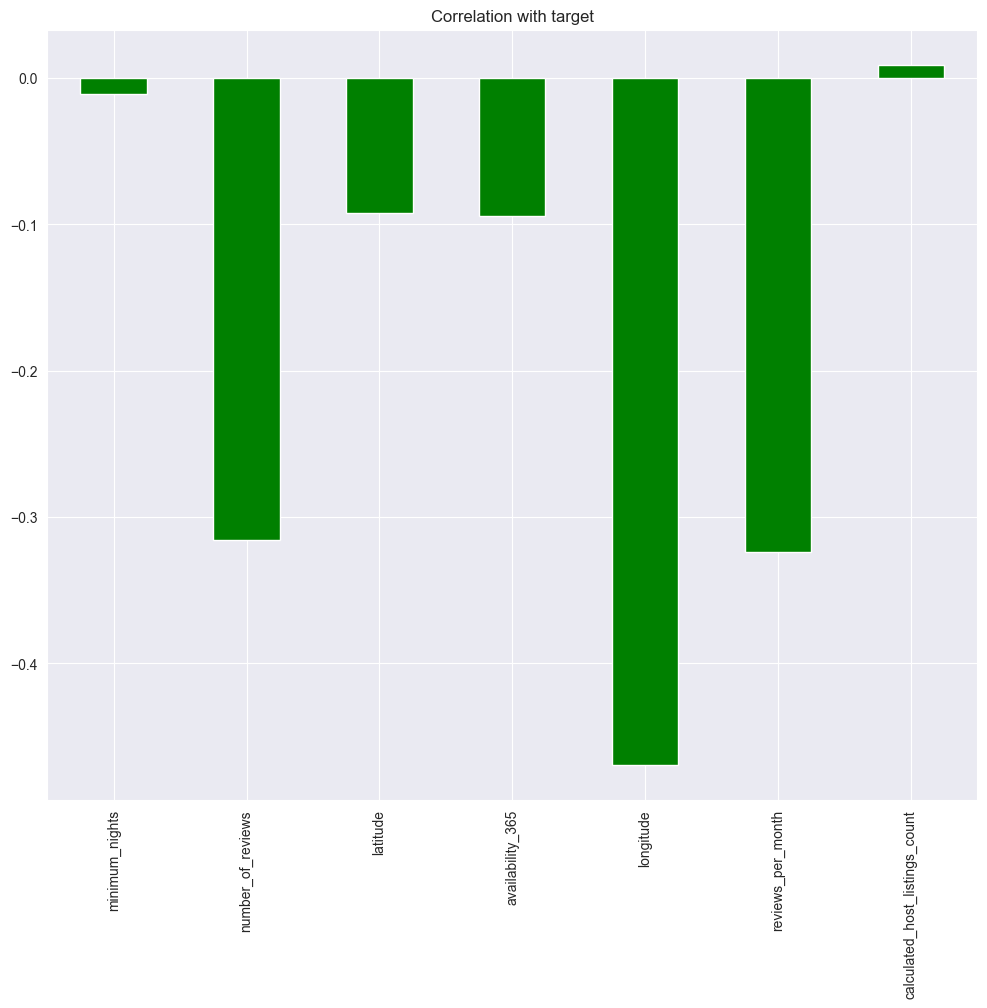

In [13]:
corr_numerical.drop('price', axis=1).corrwith(corr_numerical.price).plot(kind='bar', grid=True, figsize=(12, 10),
                                                             title="Correlation with target",color="green");

In [14]:
# # Оставим 5 признаков, где корреляция с "ценой" наибольшая 
corr_cols = corr_numerical.corr().nlargest(5, 'price')['price'].index.tolist()
corr_cols

['price',
 'calculated_host_listings_count',
 'minimum_nights',
 'latitude',
 'availability_365']

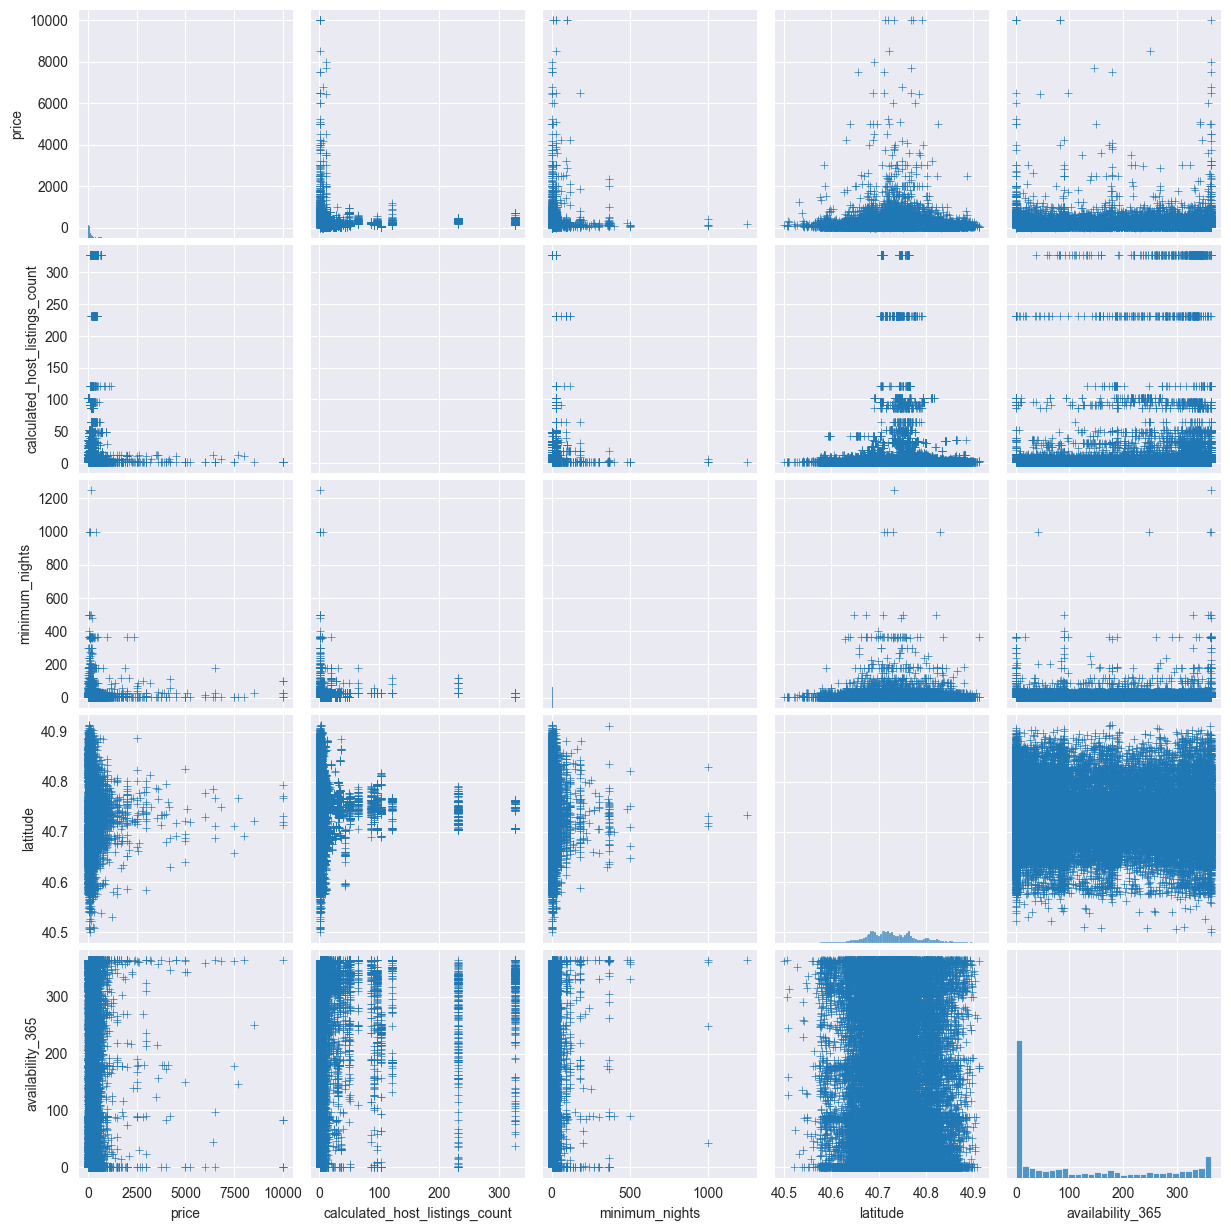

In [15]:
# Распределения признаков
# pair plot
# sns.pairplot(data[corr_cols], diag_kind = "kde", markers = "+", hue = "price", palette='viridis')
# plt.show()
sns.pairplot(data[corr_cols],markers = "+")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [17]:
# # Разделение данных на обучающий и тестовый наборы
def get_split_data(data):
    X = data.drop('price', axis=1)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return(X_train, X_test, y_train, y_test)

In [18]:

def show_metrics(name_regression,y_test,y_pred):
    print(name_regression)
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
    print(f'R2: {r2_score(y_test, y_pred):.4f}')
    print('*' * 50)
    # Создаем новый DataFrame
    metric = {
        'name_regression': [name_regression],
        'comments': [''],
        'MAE': [mean_absolute_error(y_test, y_pred)],
        'MSE': [mean_squared_error(y_test, y_pred)],
        'R2': [r2_score(y_test, y_pred)]
    }


In [19]:
def regression(X_train, X_test, y_train, y_test):
    # Простая линейная регрессия
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    show_metrics('Простая линейная регрессия', y_test, y_pred_lr)
    # Ridge регрессия
    ridge = RidgeCV()
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    show_metrics('Ridge регрессия', y_test, y_pred_ridge)
    # Lasso регрессия
    lasso = LassoCV()
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    show_metrics('Lasso регрессия', y_test, y_pred_lasso)
    # ElasticNet регрессия
    elasticnet = ElasticNetCV()
    elasticnet.fit(X_train, y_train)
    y_pred_elasticnet = elasticnet.predict(X_test)
    show_metrics('ElasticNet регрессия', y_test, y_pred_elasticnet)

In [20]:

#  как видлеи выше, reviews_per_month имеет пропуски(10052), заполним их средним значением
from sklearn.impute import SimpleImputer
# Создаем экземпляр SimpleImputer
imputer = SimpleImputer(strategy='mean')
selected_column = data[['reviews_per_month']]
# Применим SimpleImputer к выбранному столбцу с помощью метода fit_transform().
imputed_column = imputer.fit_transform(selected_column)
# Заменим исходный столбец в наборе данных на новый столбец с заполненными значениями.
data['reviews_per_month'] = imputed_column

In [21]:
## Используем только числовые признаки
print("Используем только числовые признаки", '#' * 20, '', sep="\n")
# regression(data[numerical_colums])
X_train, X_test, y_train, y_test = get_split_data(data[numerical_colums])
regression(X_train, X_test, y_train, y_test)

Используем только числовые признаки
####################

Простая линейная регрессия
MAE: 84.6828
MSE: 38494.9376
R2: 0.0469
**************************************************
Ridge регрессия
MAE: 84.6786
MSE: 38494.5654
R2: 0.0469
**************************************************
Lasso регрессия
MAE: 88.7473
MSE: 39794.3692
R2: 0.0147
**************************************************
ElasticNet регрессия
MAE: 88.7374
MSE: 39793.2158
R2: 0.0147
**************************************************


### Удалим выбросы из price, minimum_nights, number_of_reviews, reviews_per_month и calculated_host_listings_count т.к. значение max() сильно отличается от Q3.

In [22]:
data = data[
    (data.price <= data.price.quantile(0.95)) 
    & (data.minimum_nights <= data.minimum_nights.quantile(0.95))
    & (data.number_of_reviews <= data.number_of_reviews.quantile(0.95))
    & (data.reviews_per_month <= data.reviews_per_month.quantile(0.95))
    & (data.calculated_host_listings_count <= data.calculated_host_listings_count.quantile(0.95))
]

In [23]:
print("Удалили выбросы", '#' * 20, '', sep="\n")
X_train, X_test, y_train, y_test = get_split_data(data[numerical_colums])
regression(X_train, X_test, y_train, y_test)

Удалили выбросы
####################

Простая линейная регрессия
MAE: 53.4263
MSE: 4542.6351
R2: 0.0973
**************************************************
Ridge регрессия
MAE: 53.4265
MSE: 4542.4871
R2: 0.0974
**************************************************
Lasso регрессия
MAE: 53.7646
MSE: 4578.8272
R2: 0.0901
**************************************************
ElasticNet регрессия
MAE: 56.6281
MSE: 4963.8598
R2: 0.0136
**************************************************


### Как видим метрики улучшились после удаления выбросов

## Добавим новый признак - расстояние до Манхеттена


In [24]:
manhattan_lat = 40.7831
manhattan_lon = -73.9712
new_data = data.copy()
new_data['distance_to_manhattan'] = np.sqrt((data['latitude'] - manhattan_lat)**2 + (data['longitude'] - manhattan_lon)**2)
# Создадим новый датасет и удалим ненужные столбцы
new_data = data.drop(['latitude', 'longitude'], axis=1)

In [25]:
print("Добавлено расстояние до Манхеттена", '#' * 20, '', sep="\n")
new_numerical_colums = numerical_colums.copy()
new_numerical_colums.remove('latitude')
new_numerical_colums.remove('longitude')
X_train, X_test, y_train, y_test = get_split_data(new_data[new_numerical_colums])
regression(X_train, X_test, y_train, y_test)

Добавлено расстояние до Манхеттена
####################

Простая линейная регрессия
MAE: 56.6385
MSE: 4968.4598
R2: 0.0127
**************************************************
Ridge регрессия
MAE: 56.6385
MSE: 4968.4588
R2: 0.0127
**************************************************
Lasso регрессия
MAE: 56.6379
MSE: 4968.0531
R2: 0.0128
**************************************************
ElasticNet регрессия
MAE: 56.6564
MSE: 4968.3457
R2: 0.0127
**************************************************


### Метрики ухудшились

## Выполним нормализацию числовых признаков(StandardScaler и RobustScaler)

In [26]:
# Шкалирование непрерывных переменных
scaler = StandardScaler()
X_train, X_test, y_train, y_test = get_split_data(data[numerical_colums])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regression(X_train_scaled, X_test_scaled, y_train, y_test)
print('StandardScaler')

Простая линейная регрессия
MAE: 53.4263
MSE: 4542.6351
R2: 0.0973
**************************************************
Ridge регрессия
MAE: 53.4263
MSE: 4542.5806
R2: 0.0973
**************************************************
Lasso регрессия
MAE: 53.4251
MSE: 4542.3303
R2: 0.0974
**************************************************
ElasticNet регрессия
MAE: 53.4257
MSE: 4539.7772
R2: 0.0979
**************************************************
StandardScaler


In [27]:
scaler = RobustScaler()
X_train, X_test, y_train, y_test = get_split_data(data[numerical_colums])
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
regression(X_train_scaled, X_test_scaled, y_train, y_test)
print('RobustScaler')

Простая линейная регрессия
MAE: 53.4263
MSE: 4542.6351
R2: 0.0973
**************************************************
Ridge регрессия
MAE: 53.4262
MSE: 4542.5612
R2: 0.0973
**************************************************
Lasso регрессия
MAE: 53.4247
MSE: 4542.2840
R2: 0.0974
**************************************************
ElasticNet регрессия
MAE: 53.4193
MSE: 4538.9631
R2: 0.0981
**************************************************
RobustScaler


## После нормализации, метрика ElasticNet улучшилась. EStandardScaler,RobustScaler показали практически одинаковые результаты

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import CountEncoder, OneHotEncoder

In [29]:
data.nunique()

neighbourhood_group                   5
neighbourhood                       218
latitude                          17775
longitude                         13646
room_type                             3
price                               331
minimum_nights                       30
number_of_reviews                   115
reviews_per_month                   432
calculated_host_listings_count       15
availability_365                    366
dtype: int64

In [30]:
def encoder(data, enc, cols = categorial_columns):
    data_enc = data.copy()
    data_enc[cols]= enc.fit_transform(data_enc[cols])
    return data_enc

### OrdinalEncoder

In [31]:
enc = OrdinalEncoder()
ordinal_enc = encoder(data, enc)
print("Используем OrdinalEncoder", '#' * 20, '', sep="\n")
X_train, X_test, y_train, y_test = get_split_data(ordinal_enc)
regression(X_train, X_test, y_train, y_test)

Используем OrdinalEncoder
####################

Простая линейная регрессия
MAE: 39.4653
MSE: 2891.2392
R2: 0.4255
**************************************************
Ridge регрессия
MAE: 39.4652
MSE: 2891.1694
R2: 0.4255
**************************************************
Lasso регрессия
MAE: 41.6714
MSE: 3117.5805
R2: 0.3805
**************************************************
ElasticNet регрессия
MAE: 49.6495
MSE: 4023.4693
R2: 0.2005
**************************************************


### CountEncoder

In [32]:
enc = CountEncoder()
count_enc = encoder(data, enc)
print("Используем CountEncoder", '#' * 20, '', sep="\n")
X_train, X_test, y_train, y_test = get_split_data(count_enc)
regression(X_train, X_test, y_train, y_test)

Используем CountEncoder
####################

Простая линейная регрессия
MAE: 52.3584
MSE: 4407.3257
R2: 0.1242
**************************************************
Ridge регрессия
MAE: 52.3608
MSE: 4407.1700
R2: 0.1242
**************************************************
Lasso регрессия
MAE: 54.5450
MSE: 4716.5201
R2: 0.0628
**************************************************
ElasticNet регрессия
MAE: 54.5448
MSE: 4716.4944
R2: 0.0628
**************************************************


### OneHotEncoder

In [33]:
enc = OneHotEncoder()
new_categorial_columns = categorial_columns.copy()
new_categorial_columns.remove('neighbourhood')
# one_hot_enc = encoder(data,enc,cols=new_categorial_columns)
one_hot_enc = data.drop(categorial_columns + ["neighbourhood"], axis = 1).join(enc.fit_transform(data[new_categorial_columns], axis = 0))
print("Используем OneHotEncoder", '#' * 20, '', sep="\n")
# algoritms_quality_metrics(data_enc)
X_train, X_test, y_train, y_test = get_split_data(one_hot_enc)
regression(X_train, X_test, y_train, y_test)

Используем OneHotEncoder
####################

Простая линейная регрессия
MAE: 37.7557
MSE: 2697.2542
R2: 0.4640
**************************************************
Ridge регрессия
MAE: 37.7544
MSE: 2697.2127
R2: 0.4640
**************************************************
Lasso регрессия
MAE: 38.3220
MSE: 2783.2037
R2: 0.4469
**************************************************
ElasticNet регрессия
MAE: 42.6383
MSE: 3191.5908
R2: 0.3658
**************************************************


In [37]:
one_hot_enc.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_1,neighbourhood_group_2,neighbourhood_group_3,neighbourhood_group_4,neighbourhood_group_5,room_type_1,room_type_2,room_type_3
id,,,,,,,,,,,,,,,,
2539,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,0,0,0,1,0,0
2595,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0,1,0
3647,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0,0,0,1,0,0
5022,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0,1,0
5099,40.74767,-73.97500,200,3,74,0.590000,1,129,0,1,0,0,0,0,1,0


# Важность признаков 

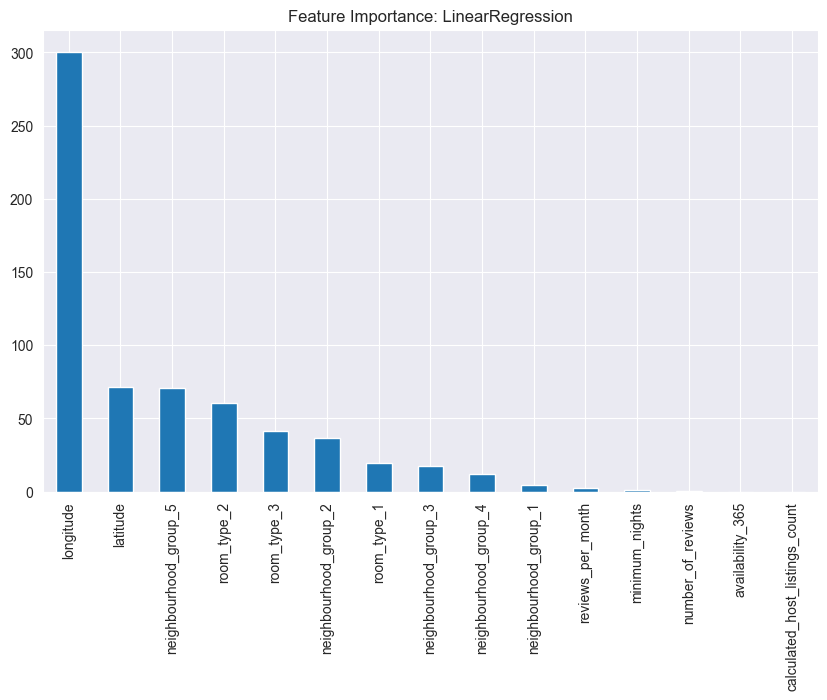

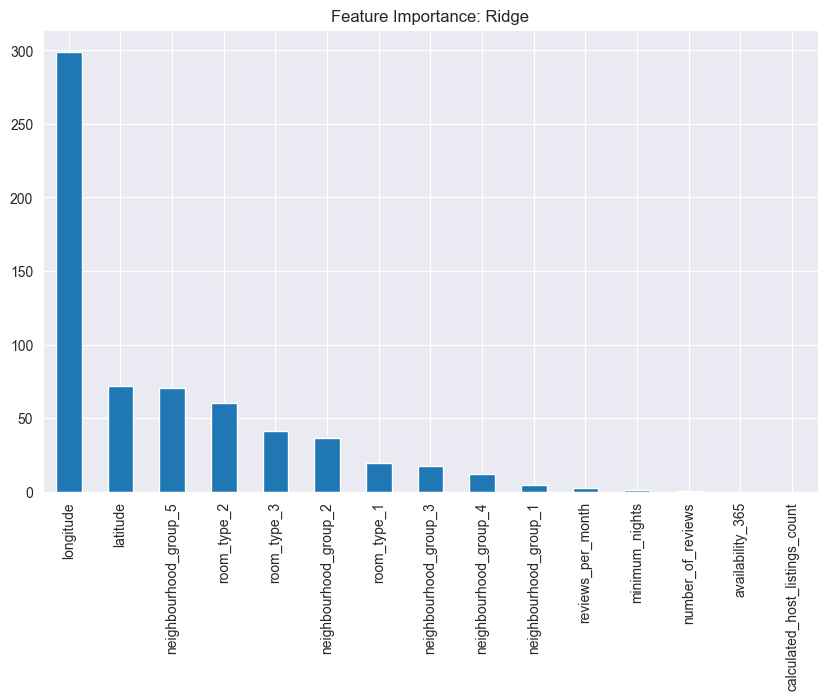

Ridge регрессия


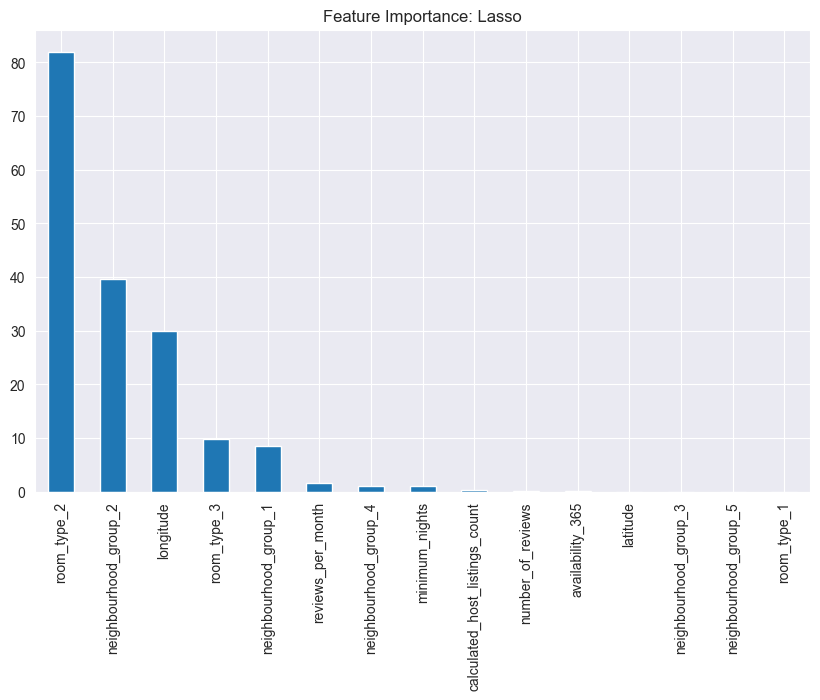

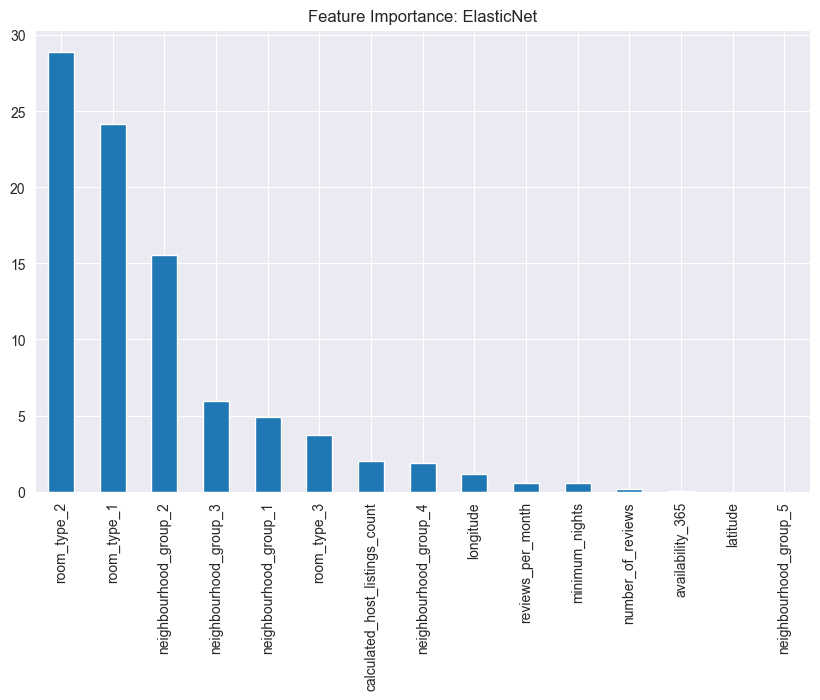

In [36]:
X_train, X_test, y_train, y_test = get_split_data(one_hot_enc)

def feature_importance(name_reg,data_i, model):
    importance = np.abs(model.coef_)
    feature_names = data_i.drop(["price"],axis=1).columns
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(f'Feature Importance: {name_reg}')
    plt.show()
# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
feature_importance('LinearRegression', one_hot_enc, lr)
# Ridge регрессия
ridge = RidgeCV()
ridge.fit(X_train, y_train)
feature_importance('Ridge', one_hot_enc, ridge)
# Lasso регрессия
lasso = LassoCV()
lasso.fit(X_train, y_train)
print('Ridge регрессия')
feature_importance('Lasso',one_hot_enc, lasso)
# ElasticNet регрессия
elasticnet = ElasticNetCV()
elasticnet.fit(X_train, y_train)
feature_importance('ElasticNet',one_hot_enc, elasticnet)